<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Import The Libraries](#1)
2.  [Read The Data](#2)
3.	[Preprocessing & EDA](#3)
    - 3.1 [Info & Discription](#3.1)
    - 3.2 [Unique Values](#3.2)
    - 3.3 [Missing Values](#3.3)
    - 3.4 [Data Duplicates](#3.4)
    - 3.5 [Label Encoding](#3.5)
    - 3.6 [Scaling & Split](#3.6)
    - 3.7 [Feature Extraction](#3.7)
4.	[Machine Learning Model](#4)
    - Decision Tree
    - Random Forest
    - Extra Trees
5.	[Evaluation](#5)

### **1. Import The Libraries** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **2. Read The Data** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

In [28]:
df_train = pd.read_csv("Datasets/Train_data.csv")

pd.set_option('display.max_columns', None)

df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


### **3. Preprocessing & EDA** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

#### **3.1  Info & Discription** <a class="anchor" id="3.1"></a>

[Table of Contents](#0.1)

 > Features Discription

<center><table border="" width="80%" nosave="">
<tbody><tr nosave="">
<td><i>feature name</i></td>

<td nosave=""><i>description&nbsp;</i></td>

<td><i>type</i></td>
</tr>

<tr>
<td>duration&nbsp;</td>

<td>length (number of seconds) of the connection&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>protocol_type&nbsp;</td>

<td>type of the protocol, e.g. tcp, udp, etc.&nbsp;</td>

<td>discrete</td>
</tr>

<tr>
<td>service&nbsp;</td>

<td>network service on the destination, e.g., http, telnet, etc.&nbsp;</td>

<td>discrete</td>
</tr>

<tr>
<td>src_bytes&nbsp;</td>

<td>number of data bytes from source to destination&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>dst_bytes&nbsp;</td>

<td>number of data bytes from destination to source&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>flag&nbsp;</td>

<td>normal or error status of the connection&nbsp;</td>

<td>discrete&nbsp;</td>
</tr>

<tr>
<td>land&nbsp;</td>

<td>1 if connection is from/to the same host/port; 0 otherwise&nbsp;</td>

<td>discrete</td>
</tr>

<tr>
<td>wrong_fragment&nbsp;</td>

<td>number of ``wrong'' fragments&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>urgent&nbsp;</td>

<td>number of urgent packets&nbsp;</td>

<td>continuous</td>
</tr>

</tbody><caption align="BOTTOM">&nbsp;
<br>Table 1: Basic features of individual TCP connections.</caption>
</table></center>

<center><table border="" width="80%" nosave="">
<tbody><tr>
<td><i>feature name</i></td>

<td><i>description&nbsp;</i></td>

<td><i>type</i></td>
</tr>

<tr>
<td>hot&nbsp;</td>

<td>number of ``hot'' indicators</td>

<td>continuous</td>
</tr>

<tr>
<td>num_failed_logins&nbsp;</td>

<td>number of failed login attempts&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>logged_in&nbsp;</td>

<td>1 if successfully logged in; 0 otherwise&nbsp;</td>

<td>discrete</td>
</tr>

<tr>
<td>num_compromised&nbsp;</td>

<td>number of ``compromised'' conditions&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>root_shell&nbsp;</td>

<td>1 if root shell is obtained; 0 otherwise&nbsp;</td>

<td>discrete</td>
</tr>

<tr>
<td>su_attempted&nbsp;</td>

<td>1 if ``su root'' command attempted; 0 otherwise&nbsp;</td>

<td>discrete</td>
</tr>

<tr>
<td>num_root&nbsp;</td>

<td>number of ``root'' accesses&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>num_file_creations&nbsp;</td>

<td>number of file creation operations&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>num_shells&nbsp;</td>

<td>number of shell prompts&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>num_access_files&nbsp;</td>

<td>number of operations on access control files&nbsp;</td>

<td>continuous</td>
</tr>

<tr nosave="">
<td>num_outbound_cmds</td>

<td nosave="">number of outbound commands in an ftp session&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>is_hot_login&nbsp;</td>

<td>1 if the login belongs to the ``hot'' list; 0 otherwise&nbsp;</td>

<td>discrete</td>
</tr>

<tr>
<td>is_guest_login&nbsp;</td>

<td>1 if the login is a ``guest''login; 0 otherwise&nbsp;</td>

<td>discrete</td>
</tr>

</tbody><caption align="BOTTOM">&nbsp;
<br>Table 2: Content features within a connection suggested by domain knowledge.</caption>
</table></center>

<center><table border="" width="80%" nosave="">
<tbody><tr>
<td><i>feature name</i></td>

<td><i>description&nbsp;</i></td>

<td><i>type</i></td>
</tr>

<tr>
<td>count&nbsp;</td>

<td>number of connections to the same host as the current connection in
the past two seconds&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td></td>

<td><i>Note: The following&nbsp; features refer to these same-host connections.</i></td>

<td></td>
</tr>

<tr>
<td>serror_rate&nbsp;</td>

<td>% of connections that have ``SYN'' errors&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>rerror_rate&nbsp;</td>

<td>% of connections that have ``REJ'' errors&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>same_srv_rate&nbsp;</td>

<td>% of connections to the same service&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>diff_srv_rate&nbsp;</td>

<td>% of connections to different services&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>srv_count&nbsp;</td>

<td>number of connections to the same service as the current connection
in the past two seconds&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td></td>

<td><i>Note: The following features refer to these same-service connections.</i></td>

<td></td>
</tr>

<tr>
<td>srv_serror_rate&nbsp;</td>

<td>% of connections that have ``SYN'' errors&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>srv_rerror_rate&nbsp;</td>

<td>% of connections that have ``REJ'' errors&nbsp;</td>

<td>continuous</td>
</tr>

<tr>
<td>srv_diff_host_rate&nbsp;</td>

<td>% of connections to different hosts&nbsp;</td>

<td>continuous&nbsp;</td>
</tr>

</tbody><caption align="BOTTOM">&nbsp;
<br>Table 3: Traffic features computed using a two-second time window.</caption>
</table></center>

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [30]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df_train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


#### **3.2 Unique Values** <a class="anchor" id="3.2"></a>

[Table of Contents](#0.1)

In [32]:
def count_unique(df):
    columns = [col for col in df.columns if df[col].nunique() < 100 or df[col].dtype == "object"]

    return [i for column in columns for i in (f"Column: {column}", df[column].value_counts(), "#"*100)]

print(*count_unique(df_train), sep="\n\n")

Column: protocol_type

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

####################################################################################################

Column: service

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64

####################################################################################################

Column: flag

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64

####################################################################################################

Column: land

0    25190
1        2
Name: land, dtype: int64

############################################################

In [33]:
# plt.figure(figsize=(40,30))
# sns.heatmap(df_train.corr(), vmin=-1, annot=True, cmap="Blues")

In [35]:
for col in df_train.columns:
    if len(df_train[col].unique()) == 1:
        print(col)

num_outbound_cmds
is_host_login


> As we see in the heatmap and the above code `num_outbound_cmds` and `is_host_login` only has one class value, so we have to drop them.

In [36]:
df_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
df_train.drop(['is_host_login'], axis=1, inplace=True)

#### **3.3 Missing Values** <a class="anchor" id="3.3"></a>

[Table of Contents](#0.1)

In [37]:
df_train.isnull().sum().sum()

0

> So, There are no null values

#### **3.4 Duplicates Values** <a class="anchor" id="3.4"></a>

[Table of Contents](#0.1)

In [38]:
df_train.duplicated().sum()

0

> As shown above there are no duplicated data in `df_train`

In [39]:
df_train.drop_duplicates(inplace=True)
df_train.duplicated().sum()

0

In [40]:
df_train.shape

(25192, 40)

#### **3.5 Label Encoding** <a class="anchor" id="3.5"></a>

[Table of Contents](#0.1)

In [41]:
from sklearn.preprocessing import LabelEncoder

def encode(df):
    for col in df.select_dtypes("object").columns:
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

encode(df_train);

In [42]:
df_train.dtypes

duration                         int64
protocol_type                    int32
service                          int32
flag                             int32
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

#### **3.7 Outliers** <a class="anchor" id="3.7"></a>

[Table of Contents](#0.1)

In [43]:
%matplotlib inline
from outlliers_treat import OutliersTreatment

In [44]:
outliers = OutliersTreatment(df_train, columns=df_train.columns[:-1])
outliers.fit()
# df_train = outliers.transform()

Index([    0,     1,     3,     4,     5,    10,    12,    13,    16,    17,
       ...
       25177, 25181, 25182, 25183, 25184, 25185, 25186, 25187, 25188, 25189],
      dtype='object', length=17299)

In [45]:
# outliers.plot()

#### **3.5 Scaling & Splitting** <a class="anchor" id="3.5"></a>

[Table of Contents](#0.1)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Xtrain, Ytrain = df_train.iloc[:, :-1], df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.3, random_state=42)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

#### **3.5 Feature Extraction** <a class="anchor" id="3.5"></a>

[Table of Contents](#0.1)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

pca.explained_variance_ratio_.cumsum()

array([0.19739165, 0.33029317, 0.42739639, 0.48211779, 0.53164045,
       0.57413037, 0.61565602, 0.64513949, 0.67294602, 0.70023065,
       0.72674891, 0.75253054, 0.77810887, 0.80361825, 0.82845763,
       0.85225554, 0.87204607, 0.88997863, 0.90562369, 0.92010793,
       0.93247007, 0.9436676 , 0.95443847, 0.9638029 , 0.97259576,
       0.97865878, 0.98419907, 0.98795155, 0.99132317, 0.99383982])

In [48]:
y_test

19064    0
11127    1
6517     0
2973     1
13339    0
        ..
15322    0
24483    0
6778     1
9500     0
19865    0
Name: class, Length: 7558, dtype: int32

### **4 Machine Learning Mode** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

models_list = [
            DecisionTreeClassifier(criterion="entropy", max_depth=12, random_state=42),
            RandomForestClassifier(criterion="entropy", max_depth=20, random_state=42),
            ExtraTreesClassifier(criterion="entropy", random_state=42),
]

models = {
    model.__class__.__name__: [f"{model.fit(x_train_pca, y_train).score(x_train_pca, y_train) * 100:.4f}", f"{model.score(x_test_pca, y_test) * 100:.4f}"]
    
    for model in models_list
}

### **5 Evaluation** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [50]:
models_table = pd.DataFrame(models.values(), columns=["train_score", "test_score"], index=models.keys())

models_table.sort_values(by='test_score', ascending=False)

,train_score,test_score
RandomForestClassifier,100.0000,99.5237
ExtraTreesClassifier,100.0000,99.5237
DecisionTreeClassifier,99.9206,99.0738


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

for model in models_list:
    print("model_name:", model.__class__.__name__, end="\n\n")
    print(classification_report(y_test, model.predict(x_test_pca)))
    print("#"*80, "\n")

model_name: DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3516
           1       0.99      0.99      0.99      4042

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558

################################################################################ 

model_name: RandomForestClassifier

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3516
           1       0.99      1.00      1.00      4042

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

################################################################################ 

model_name: ExtraTreesClassifier

              precision    recall  f1-score   support

           0       

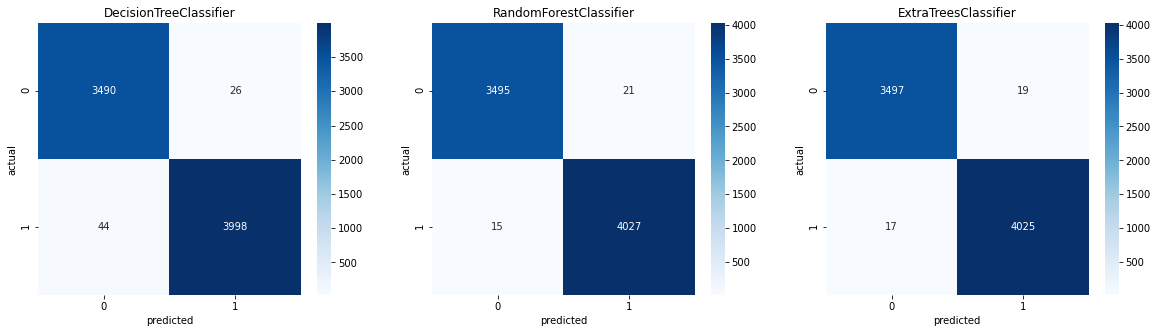

In [52]:
from math import ceil
figure , axes = plt.subplots(ceil(len(models_list) / 3), 3, figsize=(20,5))

for i, model in enumerate(models_list):
    conf_normal_sk = confusion_matrix(y_test, model.predict(x_test_pca))
    sns.heatmap(conf_normal_sk, annot=True, cmap="Blues", ax=axes[i], fmt='g')
    axes[i].set_xlabel("predicted"); axes[i].set_ylabel("actual")
    axes[i].set_title(model.__class__.__name__)

In [54]:
from sklearn.metrics import roc_curve, auc

roc_list = [[*roc_curve(y_test, model.predict(x_test_pca))] for model in models_list]

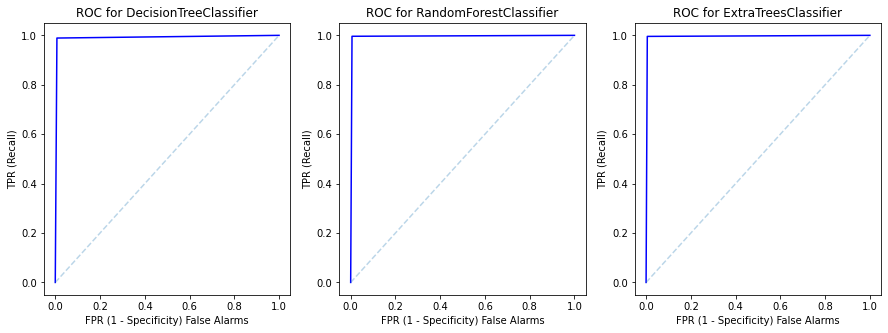

In [55]:
from math import ceil
figure , axes = plt.subplots(ceil(len(models_list) / 3), 3, figsize=(15,5))

for i, model in enumerate(models_list):
    axes[i].plot(roc_list[i][0], roc_list[i][1], color="b")
    axes[i].plot((0,1), (0,1), "--", alpha=0.3)
    axes[i].set_xlabel("FPR (1 - Specificity) False Alarms")
    axes[i].set_ylabel("TPR (Recall)")
    axes[i].set_title(f"ROC for {model.__class__.__name__}")

In [56]:
for i, model in enumerate(models_list):
    print(f"Area under the ROC curve for {model.__class__.__name__} : %{auc(roc_list[i][0], roc_list[i][1]):.5f}" )

Area under the ROC curve for DecisionTreeClassifier : %0.99086
Area under the ROC curve for RandomForestClassifier : %0.99516
Area under the ROC curve for ExtraTreesClassifier : %0.99520
